In [1]:
import numpy as np
import pandas as pd
import datetime

df=pd.read_csv('movies_dataset.csv')


### Get the type of the industry

In [2]:
df['industry'].unique()

array(['Hollywood / English', 'Tollywood', 'Wrestling',
       'Bollywood / Indian', 'Punjabi', 'Anime / Kids', nan,
       'Dub / Dual Audio', 'Pakistani', 'Stage shows', '3D Movies'],
      dtype=object)

### Process the industry columns

In [3]:
df['industry']=df['industry'].map({
    'Hollywood / English': "Holywood",
    'Bollywood / Indian':"Bolywood",
    'Anime / Kids':"Anime",
    'Tollywood':'Tollywood',
    'Wrestling':'Wrestling',
    'Punjabi':'Punjabi',
    'Pakistani':'Pakistani',
    'Stage shows':'Stage',
    '3D Movies':'3D Movies',
    'Dub / Dual Audio': "Dub"
})
df

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Holywood,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Holywood,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Holywood,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,20543,NaN,NaN,NaN,"1,998",28957,Bolywood,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,"6,219",NaN
20544,20544,7.7,NaN,Bimal Roy,"6,080",28958,Bolywood,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,"16,376","Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,20545,8.0,NaN,NaN,"3,276",30459,Bolywood,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,"7,220",NaN
20546,20546,NaN,NaN,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,"1,419",NaN


### Drop the columns with Null value
#### Reset the index value

In [4]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [5]:
df['posted_date'][2]

'20 Apr, 2021'

### Get the release and posted dates in yyyy-mm-dd format

In [6]:
posted_date=[]
release_date=[]
for i in range(len(df['posted_date'])):
    date_time_obj=datetime.datetime.strptime(df['posted_date'][i],'%d %b, %Y')
    posted_date.append(date_time_obj)
    date_time_obj=datetime.datetime.strptime(df['release_date'][i],'%b %d %Y')
    release_date.append(date_time_obj)
df['posted_date']=posted_date
df['release_date']=release_date
df

,index,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,0,4.8,R,John Swab,304,372092,Holywood,English,2023-02-20,2023-01-28,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,1,6.4,TV-PG,Paul Ziller,73,372091,Holywood,English,2023-02-20,2023-02-05,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,2,5.2,R,Ben Wheatley,"1,427",343381,Holywood,"English,Hindi",2021-04-20,2021-06-18,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,7,7,6.5,R,Benjamin Caron,"1,781",371751,Holywood,English,2023-02-13,2023-02-17,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka"
4,8,8,6.9,PG-13,Ravi Kapoor,458,372042,Holywood,English,2023-02-18,2022-12-02,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,20522,20522,7.1,Not Rated,Biren Nag,"1,932",23825,Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,076","Dhruva Chatterjee, Dev Kishan"
9898,20525,20525,7.0,G,Guy Hamilton,"2,544",25548,Holywood,"English,German,Polish,French",1970-01-01,1969-09-17,132,Historical reenactment of the air war in the e...,Battle of Britain,"9,319","James Kennaway, Wilfred Greatorex, Derek Dempster"
9899,20533,20533,5.6,R,Barbara Topsøe-Rothenborg,"12,284",1173,Holywood,"Spanish,German,English",2016-05-26,1970-01-01,90,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,"36,022","Barbara Topsøe-Rothenborg, Søren Frellesen, De..."
9900,20537,20537,7.1,Not Rated,Biren Nag,"1,932",23825,Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,077","Dhruva Chatterjee, Dev Kishan"


In [7]:
days_to_post=[]

for i in range(len(df['release_date'])):
    days_to_post.append(abs((df['posted_date'][i]-df['release_date'][i]).days))
    if not isinstance(days_to_post[i],int):
        print(df['posted_date'][i],df['release_date'][i])
df['days_to_post']=days_to_post

In [8]:
df.drop(['index','Unnamed: 0','id'],axis=1,inplace=True)
df

,IMDb-rating,appropriate_for,director,downloads,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,days_to_post
0,4.8,R,John Swab,304,Holywood,English,2023-02-20,2023-01-28,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab,23
1,6.4,TV-PG,Paul Ziller,73,Holywood,English,2023-02-20,2023-02-05,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer,15
2,5.2,R,Ben Wheatley,"1,427",Holywood,"English,Hindi",2021-04-20,2021-06-18,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley,59
3,6.5,R,Benjamin Caron,"1,781",Holywood,English,2023-02-13,2023-02-17,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka",4
4,6.9,PG-13,Ravi Kapoor,458,Holywood,English,2023-02-18,2022-12-02,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,076","Dhruva Chatterjee, Dev Kishan",2792
9898,7.0,G,Guy Hamilton,"2,544",Holywood,"English,German,Polish,French",1970-01-01,1969-09-17,132,Historical reenactment of the air war in the e...,Battle of Britain,"9,319","James Kennaway, Wilfred Greatorex, Derek Dempster",106
9899,5.6,R,Barbara Topsøe-Rothenborg,"12,284",Holywood,"Spanish,German,English",2016-05-26,1970-01-01,90,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,"36,022","Barbara Topsøe-Rothenborg, Søren Frellesen, De...",16947
9900,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,077","Dhruva Chatterjee, Dev Kishan",2792


In [9]:
run_times=[]
for run_time in df['run_time']:
    try:
        run_times.append(int(run_time))
    except:
        if 'h' in run_time and 'min' in run_time:
            date_time_obj=datetime.datetime.strptime(run_time,'%Hh %Mmin')
        elif 'h' in run_time:
            date_time_obj=datetime.datetime.strptime(run_time,'%Hh')
        else:
            try:
                date_time_obj=datetime.datetime.strptime(run_time,'%M min')
            except:
                mins=int(''.join(filter(str.isdigit, run_time)))
                hrs=mins//60
                mins=((mins/60)-hrs)*60
                date_time_obj=datetime.datetime.strptime(str(int(hrs))+":"+str(int(mins)),'%H:%M')
        run_times.append((date_time_obj.hour*60)+date_time_obj.minute)
df['run_time']=run_times

df

,IMDb-rating,appropriate_for,director,downloads,industry,language,posted_date,release_date,run_time,storyline,title,views,writer,days_to_post
0,4.8,R,John Swab,304,Holywood,English,2023-02-20,2023-01-28,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab,23
1,6.4,TV-PG,Paul Ziller,73,Holywood,English,2023-02-20,2023-02-05,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer,15
2,5.2,R,Ben Wheatley,"1,427",Holywood,"English,Hindi",2021-04-20,2021-06-18,107,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley,59
3,6.5,R,Benjamin Caron,"1,781",Holywood,English,2023-02-13,2023-02-17,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka",4
4,6.9,PG-13,Ravi Kapoor,458,Holywood,English,2023-02-18,2022-12-02,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,076","Dhruva Chatterjee, Dev Kishan",2792
9898,7.0,G,Guy Hamilton,"2,544",Holywood,"English,German,Polish,French",1970-01-01,1969-09-17,132,Historical reenactment of the air war in the e...,Battle of Britain,"9,319","James Kennaway, Wilfred Greatorex, Derek Dempster",106
9899,5.6,R,Barbara Topsøe-Rothenborg,"12,284",Holywood,"Spanish,German,English",2016-05-26,1970-01-01,90,"LOVE AT FIRST HICCUP is a charming, innocent, ...",Love at First Hiccup,"36,022","Barbara Topsøe-Rothenborg, Søren Frellesen, De...",16947
9900,7.1,Not Rated,Biren Nag,"1,932",Bolywood,Hindi,1970-01-01,1962-05-11,158,"After a lusty Thakur rapes a young girl, she k...",Bees Saal Baad,"6,077","Dhruva Chatterjee, Dev Kishan",2792


In [10]:
def percentile(value):
    count=0
    for i in range(df.shape[0]):
        if df['days_to_post'][i]<=value:
            count+=1
    return round(count/df.shape[0],1)

percentiles=[]
for i in range(df.shape[0]):
    percentiles.append(percentile(df['days_to_post'][i])*10)
    if i%100==0:
        print(((i/df.shape[0])*100),"% complete")
df['bucket']=percentiles

0.0 % complete
1.0098969905069684 % complete
2.0197939810139367 % complete
3.029690971520905 % complete
4.039587962027873 % complete
5.049484952534841 % complete
6.05938194304181 % complete
7.0692789335487785 % complete
8.079175924055747 % complete
9.089072914562715 % complete
10.098969905069682 % complete
11.10886689557665 % complete
12.11876388608362 % complete
13.128660876590587 % complete
14.138557867097557 % complete
15.148454857604523 % complete
16.158351848111494 % complete
17.16824883861846 % complete
18.17814582912543 % complete
19.188042819632397 % complete
20.197939810139363 % complete
21.207836800646334 % complete
22.2177337911533 % complete
23.22763078166027 % complete
24.23752777216724 % complete
25.247424762674207 % complete
26.257321753181174 % complete
27.267218743688144 % complete
28.277115734195114 % complete
29.287012724702084 % complete
30.296909715209047 % complete
31.306806705716017 % complete
32.31670369622299 % complete
33.326600686729954 % complete
34.33649767

In [11]:
df.to_csv('movies_dataset_processed.csv')

### Getting the type of the fields

In [12]:
result = df.dtypes

print(result)

IMDb-rating               float64
appropriate_for            object
director                   object
downloads                  object
industry                   object
language                   object
posted_date        datetime64[ns]
release_date       datetime64[ns]
run_time                    int64
storyline                  object
title                      object
views                      object
writer                     object
days_to_post                int64
bucket                    float64
dtype: object


## Encoding

In [13]:
from sklearn import preprocessing 

In [14]:
label_encoder = preprocessing.LabelEncoder()
oneHost_encoder = preprocessing.OneHotEncoder()

In [15]:
# Label Encoding for approriate_for

cpyDF = df.copy(deep=True)
cpyDF['appropriate_for']= label_encoder.fit_transform(cpyDF['appropriate_for'])


In [16]:
print(cpyDF['director'].unique().shape)
print(cpyDF['title'].unique().shape)
print(cpyDF['writer'].unique().shape)
print(cpyDF['language'].unique().shape)


(5157,)
(8482,)
(7805,)
(909,)


In [17]:
# One Hot encoding for Directory, writer, title, language, industry


cpyDF['new_title'] = cpyDF['title'].astype('category').cat.codes
cpyDF['new_writer'] = cpyDF['writer'].astype('category').cat.codes
cpyDF['new_language'] = cpyDF['language'].astype('category').cat.codes
cpyDF['new_director'] = cpyDF['director'].astype('category').cat.codes
cpyDF['new_industry']= cpyDF['industry'].astype('category').cat.codes

enc_data = pd.DataFrame(oneHost_encoder.fit_transform(cpyDF[['new_title', 'new_writer','new_language', 'new_director', 'new_industry']]).toarray())
print('Actual Data shape: ',cpyDF.shape)
print('Encoded Data shape: ', enc_data.shape)


Actual Data shape:  (9902, 20)
Encoded Data shape:  (9902, 22362)


## Correlation between the features

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
cpyDF2 = df.copy(deep=True)
cpyDF2 = df.drop(columns = ['writer', 'director', 'title', 'language', 'industry', 'storyline'])
cpyDF2['appropriate_for']= label_encoder.fit_transform(cpyDF2['appropriate_for'])
cpyDF2['views'] = cpyDF2['views'].str.replace(',', '').astype(int)

In [20]:
cpyDF2 = cpyDF2.apply(pd.to_numeric, errors='coerce')
df_numeric = cpyDF2.select_dtypes(include='number')

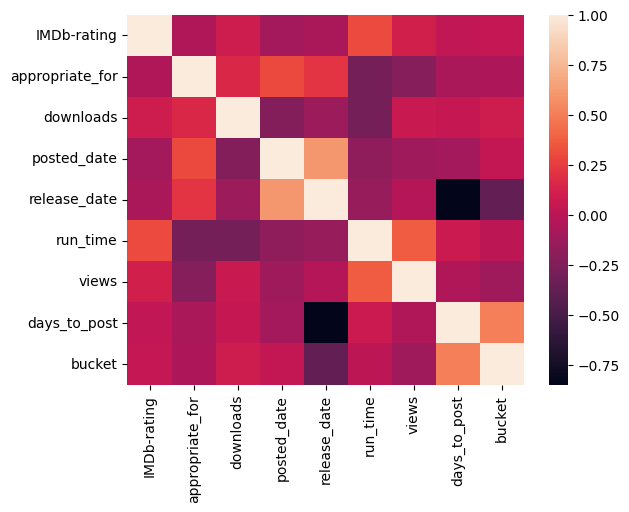

In [21]:
sns.heatmap(df_numeric.corr());

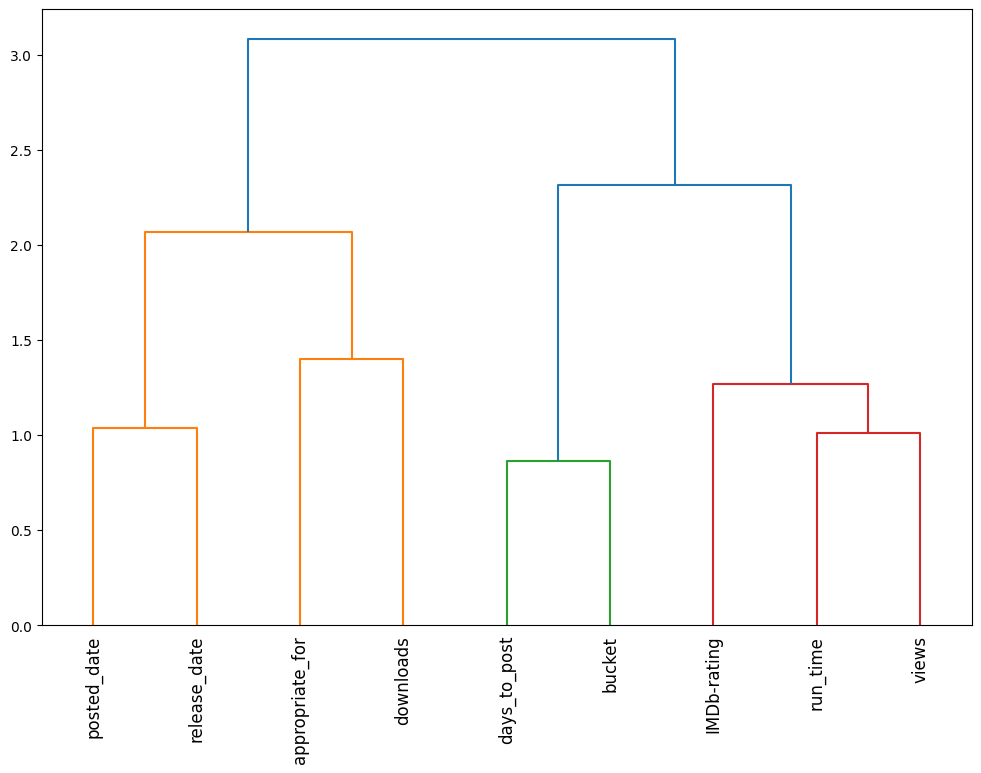

In [22]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

corr_mat = df_numeric.corr()

corr_linkage = hierarchy.ward(df_numeric.corr())
plt.figure(figsize=(12,8))
dendrogram = hierarchy.dendrogram(corr_linkage, labels=corr_mat.columns, leaf_rotation=90)
plt.show()

### Statistical Summary of the Data

In [23]:
df.describe()

,IMDb-rating,posted_date,release_date,run_time,days_to_post,bucket
count,9902.000000,9902,9902,9902.000000,9902.000000,9902.000000
mean,5.878489,2016-09-21 12:42:45.299939328,2014-02-19 13:54:26.976368640,106.909816,950.813674,5.318219
min,1.100000,1970-01-01 00:00:00,1931-03-06 00:00:00,21.000000,0.000000,1.000000
25%,5.200000,2013-12-03 00:00:00,2012-04-27 00:00:00,91.000000,1.000000,3.000000
50%,6.000000,2017-01-25 00:00:00,2016-08-29 12:00:00,101.000000,8.000000,5.000000
75%,6.675000,2021-02-09 18:00:00,2020-11-18 12:00:00,116.000000,105.000000,8.000000
max,9.300000,2023-02-20 00:00:00,2023-09-23 00:00:00,321.000000,29187.000000,10.000000
std,1.195440,NaN,NaN,22.731991,3208.943278,2.562940


In [24]:
# Measure of Skew

'''
Highly skewed distribution: If the skewness value is less than −1 or greater than +1.
Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.
Approximately symmetric distribution: If the skewness value is between −½ and +½.
'''

print(df_numeric.skew())

IMDb-rating       -0.474716
appropriate_for    0.828154
downloads          0.029245
posted_date       -2.674674
release_date      -2.808779
run_time           1.448450
views              4.928171
days_to_post       4.361903
bucket             0.154315
dtype: float64
